<a href="https://colab.research.google.com/github/priyanka12177/AML/blob/Project3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read Zip file from github into a dataframe
#Heart disease data set
df = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/AML/Project3/heart.csv')

In [3]:
#head function is used to get the first 5 rows which displays the columns and data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# the size of the dataset
df.shape

(303, 14)

In [5]:
#filtering the dataframe with target value equals 1 
df2=df[df['target']==1]
df2.shape

(165, 14)

In [6]:
#filtering the dataframe with target value equals 0 
df3=df[df['target']==0]
df3.shape

(138, 14)

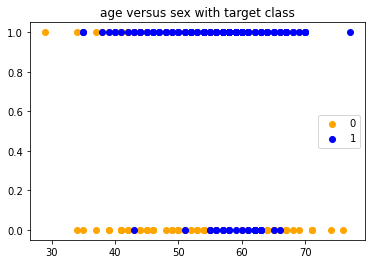

In [7]:
#scatterplot of age and sex with respect to target class which has only values 0
plt.scatter(df2['age'], df2['sex'],color = 'orange',label='0')

#scatterplot of age and sex with respect to target class which has only values 1
plt.scatter(df3['age'], df3['sex'], color = 'blue',label='1')

#title of the scatter plot
plt.title('age versus sex with target class')

#legend is used to display the labels
plt.legend(loc=5)

plt.show()



In [8]:
#perfoming pair-wise Pearson correlation of all the values in the dataframe  with respect to target

dfcorr=pd.DataFrame(df.corr(method='pearson') ['target'])

#heat map of correlation values with respect to target column
dfcorr.style.background_gradient(cmap='coolwarm', axis=None)


,target
age,-0.225439
sex,-0.280937
cp,0.433798
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696


In [9]:
#checking missing values for all the columns in the dataframe
df.isnull().sum().sort_values( ascending=False)

#As there are no missing values there is no need of imputation

target      0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [10]:
#Assigning input variables to X by excluding target column
X = df.drop('target', axis=1)

#Assigning target variables to Y
Y = df['target']

In [11]:
# Dataset is split into training by 80% and testing  with 20% 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Examine the train and test dataset sizes
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [12]:
#Performing Logistic Regression with classified data set
# Parallelize the first classification job over 5 workers
# Use Lasso regression 
# The SAGA solver supports the non-smooth penalty=l1 option (i.e. L1 Regularization).
# SAGA is the solver of choice for sparse multinomial logistic regression 
# and it's also suitable very large datasets.

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [13]:
# Accuracy scores on the training and testing sets of Logistic Regression
score1 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.70, 0.69


In [14]:
# The confusion matrix for logistic regression model
# importing confusion matrix and classification_report functions
from sklearn.metrics import confusion_matrix, classification_report

#predicting output for test data
lr_predictions = lr_classifier.predict(X_test)

#Assigning class to lables
labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,15,12
1,7,27


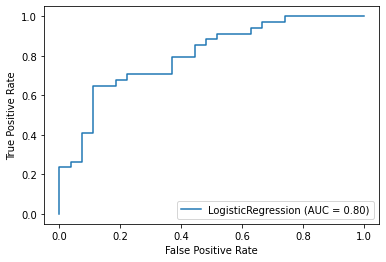

In [15]:
#Roc curve for logistic regression
#importing plot_roc_curve function
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)
#diplaying the roc curve
plt.show()

In [16]:
# SGD classifier
# Parallelize the job over 5 workers
#importing SGDClassifier function
#use l1 penality as default l2 is not fitting properly

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, penalty = 'l1',
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:

# Accuracy scores on the training and testing sets of SGD classifier

score3 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.76, 0.77


In [18]:
# confusion matrix for SGD classifier model

#predicting output for test data
sgd_predictions = sgd_classifier.predict(X_test)

#Assigning class to lables
labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,19,8
1,6,28


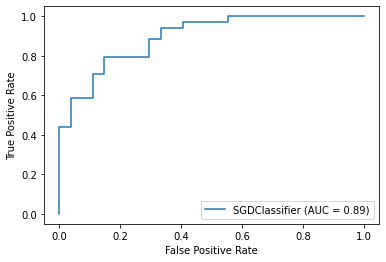

In [19]:
#Roc curve for SGD classifier model
#importing plot_roc_curve function
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)

#display the ROC curve
plt.show()

In [20]:
# RandomForestClassifier classification model
#import RandomForestClassifier function
# Parallelize the job over 5 workers
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=1000,
                                       n_jobs=5,
                                       max_features=3)

# Fit the model
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=5, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
# Accuracy scores on the training and testing sets of RandomForestClassifier model

score5 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))
# Model might be over fitting as it performed well on training data and but performance decreased on test data

Training and Testing scores: 1.00, 0.87


In [22]:
#confusion matrix of RandomForestClassifier model

#predicting output for test data
RandomForest_predictions = rf_classifier.predict(X_test)

#Assigning class to lables
labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
RF_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = RandomForest_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
RF_cr = classification_report(y_true=Y_test, 
                      y_pred = RandomForest_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(RF_cm, index=labels, columns=labels)

,0,1
0,22,5
1,3,31


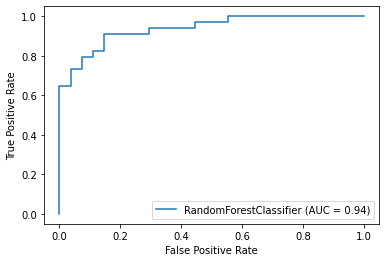

In [23]:
#Roc curve for RandomForestClassifier model
#importing plot_roc_curve function
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier, X_test, Y_test, ax=ax)
#display the roc curve
plt.show()

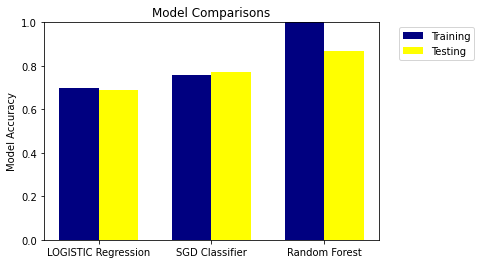

In [24]:
# Summarize the findings for all models

labels = ['LOGISTIC Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

In [25]:
# StandardScale the data
#import StandardScaler function
from sklearn.preprocessing import StandardScaler

# also try MinMaxScaler
scaler = StandardScaler()

#fit the model
scaler.fit(X)

#scaled data by performing standardizations
scaled_data = scaler.transform(X)

#creating data frame from scaled_data array
scaled_data2 = pd.DataFrame(scaled_data,columns=X.columns,index=X.index)

In [26]:
#Assigning scaled data to variable X1 by excluding target column
X1 = scaled_data2

#Assigning target variable to Y1
Y1 = Y

In [27]:
# Dataset is split into training by 80% and testing  with 20% 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

# Examine the train and test dataset sizes
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [28]:
# Performing Logistic Regression with classified data set
# Parallelize the first classification job over 5 workers
# Use Lasso regression 
# The SAGA solver supports the non-smooth penalty=l1 option (i.e. L1 Regularization).
# SAGA is the solver of choice for sparse multinomial logistic regression 
# and it's also suitable very large datasets.

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

convergence after 10 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [29]:
# Accuracy scores on the training and testing sets of Logistic Regression
score7 = round(lr_classifier.score(X_train, Y_train), 2) # training score
score8 = round(lr_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score7, score8))

Training and Testing scores: 0.84, 0.84


In [30]:
# SGD classifier
# Parallelize the job over 5 workers
# importing SGDClassifier function
# use l1 penality as default l2 is not fitting properly

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, penalty = 'l1',
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
# Accuracy scores on the training and testing sets  of SGD classifier

score9 = round(sgd_classifier.score(X_train, Y_train), 2) # training score
score10 = round(sgd_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score9, score10))

Training and Testing scores: 0.77, 0.70


In [32]:
# RandomForestClassifier classification model
# import RandomForestClassifier function
# Parallelize the job over 5 workers

from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=1000,
                                       n_jobs=5,
                                       max_features=3)
# Fit the model
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=5, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
# Accuracy scores on the training and testing sets of RandomForestClassifier model

score11 = round(rf_classifier.score(X_train, Y_train), 2) # training score
score12 = round(rf_classifier.score(X_test, Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score11, score12))

Training and Testing scores: 1.00, 0.85


**SUMMARY**

Side-by-side comparison of the 3 models demonstrates that the Random Forest (RF) model provides the highest classification accuracy on both the training and testing cases. However, such a high classification accuracy on the training set is indicative of high bias, so cross-validation using k folds would be a more appropriate measure of judging the model's true power of prediction. 


The plotted ROC curve for the model Random Forest (RF) model shows a very large AUC which is another indicator of the model's highest classification accuracy among all three models.

After performing standardization on the data we see improvment in the acurracies for all the models as certain variables like chol , trestbs,thalach have large scale compared to other



---




